[0.015431084667514108, -0.0030284689517181165, 0.0029157822739928883, 0.01563517100794287, 0.004942229351125238, -0.009596647647618051, 0.011409645938565263, -0.007816925898768326, 0.011071901022261915, -0.014507425318764105, 0.0017748618718507944, -0.002384266898762916, -0.017568009028743274, -0.010144074875460813, -0.0037367186182344692, 0.001156260125449047, -0.003946455623001765, -0.010143367188070051, 0.005427907007548987, 0.004249131091814919, -0.001740671392827823, -0.0021079330240904104, 0.023243054673762552, -0.014404810416243793, 0.0038584232937200467, 0.005389642883301229, 0.01869170792945568, 0.010602410250850314, -0.00991987897853667, -0.01052522515101963, -0.010449526018836641, 0.0007028321535817802, 0.0, 0.00869762106140688, -0.000587532351732018, 0.0025641989562983744, -0.006574921942824505, 0.02784558500717445, 0.00012387990474525929, 0.018085205123336584, -0.00305293747018783, 0.004709243850419911, 0.01721541654124056, 0.001212807877274447, -0.009212498326050833, -0.0

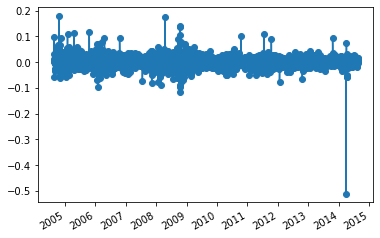

In [75]:
import csv
from datetime import datetime
#import panda as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

with open('google_stock_data.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    #header = next(csv_reader)
    data = [] # [row for row in csv_reader]
    for line in csv_reader:
        date = datetime.strptime(line['Date'], "%m/%d/%Y")
        #print(date)
        open_price = float(line['Open'])
        high = float(line['High'])
        low = float(line['Low'])
        close = float(line['Close'])
        volume = int(line['Volume'])
        Aj = float(line['Adj Close'])
        data.append([date,open_price,high,low,close,volume,Aj])
        
    with open('new_file.csv','w') as new_file:
        csv_writer = csv.writer(new_file, delimiter='\t')
        csv_writer.writerow(['date', 'value'])
        
        for i in range(len(data)-1):
            toadys_date = data[i][0]
            #print(toadys_date)
            todays_price = data[i][1]
            yesterdays_price = data[i+1][1]
            daily_return = (todays_price - yesterdays_price)/yesterdays_price
            formated_date = toadys_date.strftime('%Y/%m/%d')
            #print(formated_date)
            csv_writer.writerow([formated_date, daily_return])
    
with open('new_file.csv', 'r') as plot_file:
    plt_reader = csv.DictReader(plot_file, delimiter='\t')
    #header = next(plt_reader)
    x_axis = []
    y_axis = []
    dates = []
    values = []
    for line in plt_reader:
        dates.append(line['date'])
        values.append(float(line['value']))
    
    x_values = [datetime.strptime(d,"%Y/%m/%d").date() for d in dates]
    print(values)
    '''
    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)
    
    plt.plot(x_values, values)
    plt.title('daily return')
    plt.savefig('values.png', format='PNG')
    plt.show()
    '''
    plt.plot_date(x_values, values, linestyle='solid')
    plt.gcf().autofmt_xdate()
    plt.show()
            